<a href="https://colab.research.google.com/github/jonathansantoss/teste_datarisk/blob/master/Aprovacao_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [52]:
dataset_treino = pd.read_csv('./treino.csv')

dataset_treino.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [50]:
dataset_teste = pd.read_csv('./teste.csv')

dataset_teste.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [22]:
dataset_treino.isna().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

In [23]:
dataset_teste.isna().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

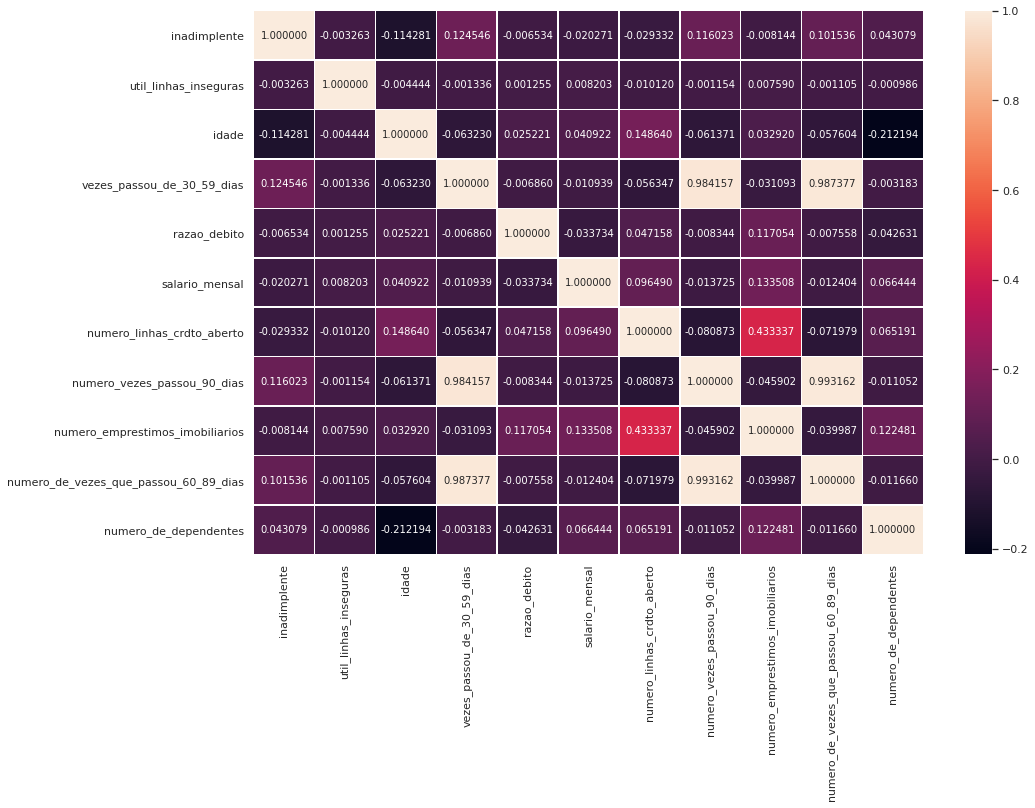

In [24]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dataset_treino.corr(), annot=True, fmt="f", linewidths=.5, ax=ax)

In [53]:
y_treino = dataset_treino['inadimplente']
x_treino = dataset_treino.drop(columns=['numero_de_dependentes',
                                        'salario_mensal',
                                        'inadimplente'])
std = StandardScaler()
x_treino_scaler = std.fit_transform(x_treino)

In [27]:
x_teste = dataset_teste.drop(columns=['numero_de_dependentes',
                                      'salario_mensal'])

x_teste_scaler = std.transform(x_teste)

In [41]:
clf_v1 = DecisionTreeClassifier()

X, X_val, y, y_val = train_test_split(x_treino_scaler, y_treino, random_state=0, test_size=0.2, shuffle=False)

modelo_v1 = clf_v1.fit(X, y)
previsoes_v1 = modelo_v1.predict(X_val)

print(f"Acurácia: {(accuracy_score(y_val, previsoes_v1) * 100):.2f}%")

Acurácia: 89.72%


In [42]:
parameters = {'criterion':['gini', 'entropy'],
         'max_features':['sqrt', 'sqrt'],
         'max_leaf_nodes':[2, 4, 6, 8, 10]}

grid = GridSearchCV(clf, param_grid=parameters)
grid.fit(x_treino_scaler, y_treino)
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
clf_v2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

modelo_v2 = clf_v2.fit(X, y)
previsoes_v2 = modelo_v2.predict(X_val)

print(f"Acurácia: {(accuracy_score(y_val, previsoes_v2) * 100):.2f}%")

Acurácia: 93.20%


In [44]:
modelo_v3 = clf_v2.fit(x_treino_scaler, y_treino)
y_pred = modelo_v3.predict(x_teste_scaler)

submission = dataset_teste
submission['inadimplente'] = y_pred
submission.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0


In [45]:
submission.to_csv('submission.csv', index=False)